In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#changing the working directory
%cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [3]:
import os
from pathlib import Path
from keras.preprocessing import image
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow
import itertools

In [4]:
p=Path("./ML/projects/Waste-Segregration-main/dataset-resized/")
dirs=p.glob("*")
image_data=[]
labels=[]

image_path=[]  #Optional

label_dict={"cardboard":0,
           "glass":1,
           "metal":2,
           "paper":3,
           "plastic":4,
           "trash":5}
label2gar={0:"cardboard",
               1:"glass",
               2:"metal",
               3:"paper",
               4:"plastic",
               5:"trash"}

for folder_dir in dirs:
  label=str(folder_dir).split("/")[-1]
  
  print(label)
  cnt=0
    
  #Iterate over folder_dir and pick all images of the waste material
  for img_path in folder_dir.glob("*.jpg"):
      print(img_path)
      img=image.load_img(img_path,target_size=(224,224))
      img_array=image.img_to_array(img)
      image_data.append(img_array)
      labels.append(label_dict[label])
      cnt+=1
      
  print(cnt)

trash
ML/projects/Waste-Segregration-main/dataset-resized/trash/trash35.jpg
ML/projects/Waste-Segregration-main/dataset-resized/trash/trash68.jpg
ML/projects/Waste-Segregration-main/dataset-resized/trash/trash91.jpg
ML/projects/Waste-Segregration-main/dataset-resized/trash/trash98.jpg
ML/projects/Waste-Segregration-main/dataset-resized/trash/trash13.jpg
ML/projects/Waste-Segregration-main/dataset-resized/trash/trash37.jpg
ML/projects/Waste-Segregration-main/dataset-resized/trash/trash111.jpg
ML/projects/Waste-Segregration-main/dataset-resized/trash/trash128.jpg
ML/projects/Waste-Segregration-main/dataset-resized/trash/trash76.jpg
ML/projects/Waste-Segregration-main/dataset-resized/trash/trash14.jpg
ML/projects/Waste-Segregration-main/dataset-resized/trash/trash36.jpg
ML/projects/Waste-Segregration-main/dataset-resized/trash/trash32.jpg
ML/projects/Waste-Segregration-main/dataset-resized/trash/trash46.jpg
ML/projects/Waste-Segregration-main/dataset-resized/trash/trash60.jpg
ML/projects/

In [5]:
X=np.array(image_data)
X=X/255.0
Y=np.array(labels)
print(X.shape,Y.shape)

(2527, 224, 224, 3) (2527,)


In [6]:
def drw_img(X,label):
    plt.title(label2gar[label])
    plt.axis("off")
    plt.imshow(X)

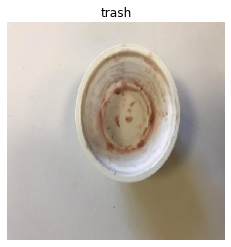

In [7]:
drw_img(X[0],Y[0])

In [8]:
print(Y)
from sklearn.utils import shuffle
X,Y=shuffle(X,Y,random_state=2)
print(Y)

[5 5 5 ... 1 1 1]
[0 4 4 ... 1 1 2]


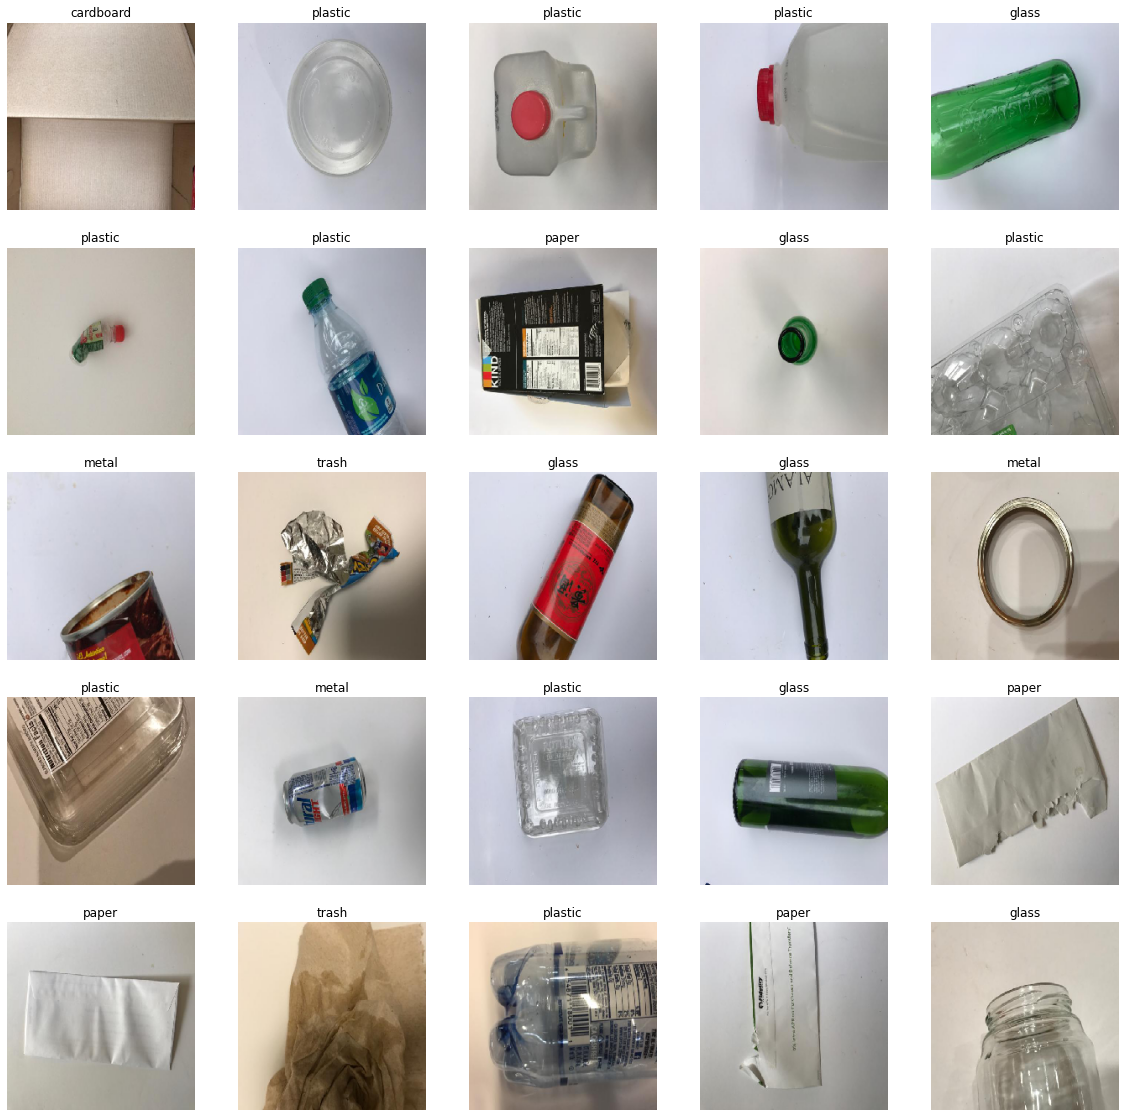

In [9]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    drw_img(X[i],Y[i])

In [10]:
X_=np.array(X)
Y_=np.array(Y)

Y_=np_utils.to_categorical(Y_)
print(X_.shape,Y_.shape)

split=int((0.8)*X_.shape[0])
print(split)

X_train=X_[:split,:]
Y_train=Y_[:split,:]

X_test=X_[split:,:]
Y_test=Y_[split:,:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2527, 224, 224, 3) (2527, 6)
2021
(2021, 224, 224, 3) (2021, 6)
(506, 224, 224, 3) (506, 6)


In [11]:
model=Sequential()
model.add(Convolution2D(32,(1,1),activation='relu',input_shape=(224,224,3)))
model.add(Convolution2D(64,(2,2),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(128,(4,4),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(256,(1,1),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      128       
                                                                 
 conv2d_1 (Conv2D)           (None, 223, 223, 64)      8256      
                                                                 
 dropout (Dropout)           (None, 223, 223, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [12]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [13]:
hist=model.fit(
        X_train,
        Y_train,
        epochs=60,
        shuffle=True,
        batch_size=16,
        validation_split=0.20,
)

Epoch 1/60
101/101 [==============================] - 24s 175ms/step - loss: 1.7741 - accuracy: 0.2252 - val_loss: 1.7447 - val_accuracy: 0.2494
Epoch 2/60
101/101 [==============================] - 17s 167ms/step - loss: 1.7147 - accuracy: 0.2506 - val_loss: 1.6660 - val_accuracy: 0.3136
Epoch 3/60
101/101 [==============================] - 17s 167ms/step - loss: 1.6949 - accuracy: 0.2605 - val_loss: 1.6588 - val_accuracy: 0.2988
Epoch 4/60
101/101 [==============================] - 17s 167ms/step - loss: 1.6208 - accuracy: 0.2896 - val_loss: 1.5555 - val_accuracy: 0.3630
Epoch 5/60
101/101 [==============================] - 17s 166ms/step - loss: 1.6032 - accuracy: 0.2983 - val_loss: 1.4948 - val_accuracy: 0.4444
Epoch 6/60
101/101 [==============================] - 17s 166ms/step - loss: 1.5880 - accuracy: 0.2797 - val_loss: 1.4607 - val_accuracy: 0.4148
Epoch 7/60
101/101 [==============================] - 17s 165ms/step - loss: 1.5187 - accuracy: 0.3298 - val_loss: 1.4448 - val_ac

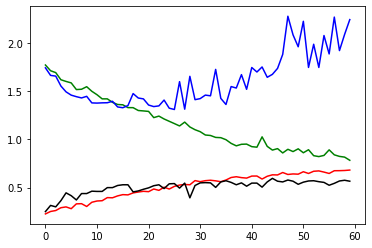

In [14]:
plt.figure(0)
plt.plot(hist.history['loss'],'green')
plt.plot(hist.history['val_loss'],'blue')
plt.plot(hist.history['accuracy'],'red')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

In [16]:
Y_pred=model.predict(X_test)
Y_pred=np.argmax(Y_pred,axis=1)  #get max from each row
print(Y_pred)
actual_Y_label=np.argmax(Y_test,axis=1)

class_name=["cardboard","glass","metal","paper","plastic","trash"]
cls_report=classification_report(actual_Y_label,Y_pred,target_names=class_name)
print(cls_report)

[1 0 3 2 1 4 3 2 1 4 1 2 2 2 3 0 1 3 1 2 3 2 2 4 1 3 1 3 2 2 1 1 2 4 4 1 1
 3 1 2 3 1 2 1 1 1 1 2 2 4 3 1 1 4 2 0 1 1 2 1 0 1 1 0 4 3 3 2 1 3 3 1 1 1
 3 2 2 4 0 1 2 2 1 4 3 2 2 0 2 1 4 4 1 2 1 2 0 4 0 3 2 0 2 3 4 1 4 2 0 4 2
 3 0 3 0 4 4 2 2 1 2 1 3 4 1 3 2 1 1 1 1 2 0 2 2 1 2 3 1 1 4 0 2 1 0 3 1 1
 2 1 1 0 3 2 4 2 1 4 1 1 0 4 2 1 0 2 1 0 2 4 1 3 1 3 2 1 2 1 3 4 1 2 2 1 2
 0 1 1 1 2 1 3 0 0 1 1 1 2 3 0 3 3 3 3 3 2 2 1 2 3 4 3 1 4 3 1 0 2 1 0 3 1
 2 3 2 3 1 4 2 4 2 3 0 3 0 0 4 3 1 1 0 1 3 1 3 2 2 2 1 3 2 2 2 3 2 1 1 2 4
 2 3 3 2 1 4 1 3 2 3 4 3 2 3 2 0 2 2 3 3 1 2 1 2 1 1 4 4 2 3 3 3 4 1 1 4 2
 0 2 4 4 2 0 2 1 1 0 3 0 0 1 1 1 2 0 2 4 1 1 4 4 2 3 4 2 3 3 1 4 0 3 3 1 1
 2 1 1 0 0 1 3 2 2 4 1 1 1 2 3 1 2 0 0 1 3 3 2 0 4 2 3 3 4 4 1 4 1 1 2 1 2
 1 2 1 2 1 1 1 3 1 0 3 1 2 3 3 1 3 1 3 2 2 3 2 0 2 2 1 3 1 1 0 2 2 3 2 3 0
 2 3 0 1 3 1 2 3 2 2 1 2 4 1 3 3 3 1 4 3 3 2 1 4 0 0 3 2 1 4 3 2 1 0 1 1 4
 3 3 2 4 1 0 2 1 4 1 2 2 1 0 2 2 1 2 1 3 0 3 0 0 3 3 4 2 1 3 3 2 4 3 4 2 3
 1 2 1 2 4 4 2 3 4 1 2 2 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

[[45  8 14  9  1  0]
 [ 3 60 20  2 10  0]
 [ 0 19 52  8  6  0]
 [ 4 17 13 73  6  0]
 [ 3 32 16 13 41  0]
 [ 1 11 17  0  2  0]]


<Figure size 432x288 with 0 Axes>

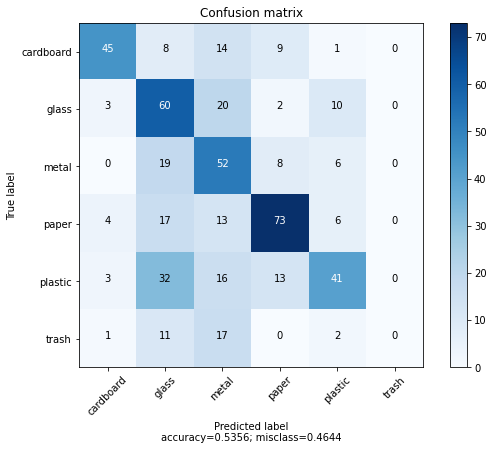

In [18]:
cnf_matrix=confusion_matrix(actual_Y_label,Y_pred,labels=[0,1,2,3,4,5])
print(cnf_matrix)
plt.figure()
plot_confusion_matrix(cnf_matrix,target_names=class_name,normalize=False)

In [19]:
img_path='./ML/projects/Waste-Segregration-main/dataset-resized/cardboard/'
for i in range(Y_test.shape[0]):
    if Y_pred[i]!=actual_Y_label[i]:
        print("Predict %s but actual  is %s"%(label2gar[Y_pred[i]],label2gar[actual_Y_label[i]]))

Predict metal but actual  is glass
Predict glass but actual  is metal
Predict glass but actual  is plastic
Predict glass but actual  is trash
Predict metal but actual  is plastic
Predict paper but actual  is plastic
Predict glass but actual  is metal
Predict metal but actual  is cardboard
Predict metal but actual  is paper
Predict metal but actual  is trash
Predict glass but actual  is metal
Predict glass but actual  is trash
Predict glass but actual  is trash
Predict glass but actual  is metal
Predict plastic but actual  is glass
Predict glass but actual  is cardboard
Predict glass but actual  is plastic
Predict metal but actual  is trash
Predict glass but actual  is paper
Predict metal but actual  is paper
Predict glass but actual  is metal
Predict glass but actual  is cardboard
Predict glass but actual  is plastic
Predict metal but actual  is trash
Predict metal but actual  is plastic
Predict plastic but actual  is paper
Predict glass but actual  is plastic
Predict glass but actual 

In [20]:
def predict_image(image_path):
    img=image.load_img(image_path,target_size=(224,224))
    img_array=image.img_to_array(img)
    img_array=np.array(img_array)
    img_array=img_array.reshape(224,224,3)
    prob=model.predict(img_array.reshape(-1,224,224,3))
    prob=np.array(prob)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    print(label2gar[np.argmax(prob)])

In [21]:
model_json = model.to_json()
with open("modelg.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("modelg.h5")

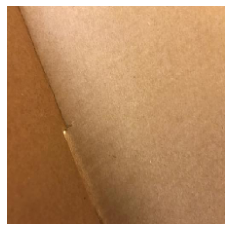

cardboard


In [29]:
predict_image('./ML/projects/Waste-Segregration-main/dataset-resized/cardboard/cardboard5.jpg')